<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Actualizado_Preentrega_Proyecto_Final-Melina_Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de comportamiento de compradores de viaje online**
*¿Cómo compran sus viajes los viajeros?*


# **Contexto**
En el entorno digital actual, los viajeros dedican una cantidad significativa de tiempo en línea investigando sobre sus destinos, buscando recomendaciones y comparando opciones. La dinámica económica contemporánea ha impulsado a un mayor número de personas a invertir sus ahorros en experiencias de viaje, incrementando la demanda de servicios turísticos.

# **Audiencia**
Este informe está diseñado para proporcionar información valiosa a profesionales de marketing y del sector turístico, con el objetivo de optimizar sus estrategias y alinear sus ofertas de viajes para maximizar las ventas y satisfacer las crecientes expectativas de los consumidores.
Este enfoque refuerza la importancia del contexto digital y económico, y deja claro que el informe busca ser una herramienta para los profesionales del sector.

# ***Preguntas Generales***
- ¿Cuál es la distribución de compra de viajes según el estado laboral de las personas?
- ¿Cómo varía la compra de viajes según el dispositivo preferido para acceder a la página web?
- ¿Existe una relación entre el número de conexiones sociales que han viajado y la decisión de compra de un viaje?
- ¿El seguimiento de la página web influye en la probabilidad de compra de un viaje?
- ¿Qué relación existe entre el tiempo promedio diario que una persona pasa en la página web y su decisión de compra?

# ***Preguntas Específicas***
- ¿Cómo afecta la cantidad de miembros en la familia a la decisión de compra de un viaje?
- ¿Qué papel juega la edad en la decisión de compra de viajes?


In [70]:
# Instalar la librería kaggle
!pip install kaggle

# Crear la carpeta .config/kaggle si no existe
!mkdir -p /root/.config/kaggle/

# Descargar el archivo kaggle.json desde GitHub
!wget --no-check-certificate 'https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json' -O /root/.config/kaggle/kaggle.json

# Configurar los permisos para el archivo kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

# Ver el nombre de los archivos del dataset
import kaggle
!kaggle datasets files ddosad/customer-behaviour-tourism-portal


--2024-10-17 19:02:38--  https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/main/Modulo2/kaggle/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘/root/.config/kaggle/kaggle.json’

/root/.config/kaggl 100%[===================>]      63  --.-KB/s    in 0s      

2024-10-17 19:02:38 (2.47 MB/s) - ‘/root/.config/kaggle/kaggle.json’ saved [63/63]

name                             size  creationDate         
------------------------------  -----  -------------------  
Customer behaviour Tourism.csv  820KB  2023-11-13 15:17:10  


In [71]:
#Instalar libreria missingo
!pip install missingno

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
import missingno as msno
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import zipfile
import os
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import classification_report

# Silence Warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [73]:
# Descargar el dataset desde Kaggle
!kaggle datasets download -d ddosad/customer-behaviour-tourism-portal

# Descomprimir el archivo descargado
dataset_zip = "customer-behaviour-tourism-portal.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv("Customer behaviour Tourism.csv")
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal
License(s): other
customer-behaviour-tourism-portal.zip: Skipping, found more recently modified local copy (use --force to force download)
    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3   

Dataset reference: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

# Columnas:
**UserID**:	Unique ID of the user

**Taken_product**: Whether the customer buy the ticket or not

**Yearly_avg_view_on_travel_page**:	Average yearly views on any travel-related page by the user

**preferred_device**:	Preferred device for user login

**total_likes_on_outstation_checkin_given**:	Total number of likes given by the user on out-of-station check-ins in the last year

**yearly_avg_Outstation_checkins**:	Average number of out-of-station check-ins done by the user

**member_in_family**:	Total number of relationships mentioned by the user in the account

**preferred_location_type**:	Preferred type of location for traveling by the user

**Yearly_avg_comment_on_travel_page**:	Average yearly comments on any travel-related page by the user

**total_likes_on_outofstation_checkin_received**:	Total number of likes received by the user on out-of-station check-ins in the last year

**week_since_last_outstation_checkin**:	Number of weeks since the last out-of-station check-in update by the user

**following_company_page**:	Whether the customer is following the company page (Yes or No)

**montly_avg_comment_on_company_page**:	Average monthly comments on the company page by the user

**working_flag**:	Whether the customer is working or not

**travelling_network_rating**:	The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest

**Adult_flag**:	Whether the customer is an adult or not

**Daily_Avg_mins_spend_on_traveling_page**:	Average time spent on the company's travel page by the user

In [74]:
# Ver la lista de columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [75]:
df.describe().round(1)

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11760.0,11179.0,11379.0,11554.0,11760.0,11760.0,11760.0,11760.0,11759.0,11759.0
mean,1005880.5,280.8,28170.5,74.8,6531.7,3.2,28.7,2.7,0.8,13.8
std,3395.0,68.2,14385.0,24.0,4706.6,2.6,48.7,1.1,0.9,9.1
min,1000001.0,35.0,3570.0,3.0,1009.0,0.0,4.0,1.0,0.0,0.0
25%,1002940.8,232.0,16380.0,57.0,2940.8,1.0,17.0,2.0,0.0,8.0
50%,1005880.5,271.0,28076.0,75.0,4948.0,3.0,22.0,3.0,1.0,12.0
75%,1008820.2,324.0,40525.0,92.0,8393.2,5.0,27.0,4.0,1.0,18.0
max,1011760.0,464.0,252430.0,815.0,20065.0,11.0,500.0,10.0,3.0,270.0


In [76]:
# Valores únicos para la columna yearly_avg_Outstation_checkins
print(df['yearly_avg_Outstation_checkins'].unique())

['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']


In [77]:
#Reemplazar * en la columna yearly_avg_Outstation_checkins por 0
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', 0)
# Convertir la columna 'yearly_avg_Outstation_checkins' a tipo float64
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype('float64')

In [78]:
#Setear columnas categoricas con tipo de dato category
df["Taken_product"]= df["Taken_product"].astype("category")
df["preferred_device"]= df["preferred_device"].astype("category")
df["member_in_family"]=df["member_in_family"].astype("category")
df["preferred_location_type"]=df["preferred_location_type"].astype("category")
df["following_company_page"]=df["following_company_page"].astype("category")
df["working_flag"]=df["working_flag"].astype("category")
df.describe(include="category")

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11760,11729,11657,11760
unique,2,10,7,15,5,3
top,No,Tab,3,Beach,No,No
freq,9864,4172,4561,2424,8355,9951


In [79]:
# Valores únicos para la columna 'Adult_flag'
print(df['Adult_flag'].unique())

# Valores únicos para la columna 'member_in_family'
print(df['member_in_family'].unique())


[ 0.  1.  3.  2. nan]
['2', '1', '4', 'Three', '3', '5', '10']
Categories (7, object): ['1', '10', '2', '3', '4', '5', 'Three']


In [80]:
# Basado en la información adquirida en Keaggle
# Reemplazar valores distintos a 0 de la columna Adult_flag por 1
df['Adult_flag'] = df['Adult_flag'].replace([2,3,4,5], 1)
df['Adult_flag'] = df['Adult_flag'].fillna(0)
df['Adult_flag'] = df['Adult_flag'].astype('int64')

In [81]:
# Reemplazar 'Three' por 3 en la columna 'member_in_family'
df['member_in_family'] = df['member_in_family'].replace('Three', 3)

# Convertir la columna 'member_in_family' a int64
df['member_in_family'] = df['member_in_family'].astype('int64')


In [82]:
#Ver valores distintos para las columnas following_company_page,	working_flag
print("Valores distintos para following_company_page:", df['following_company_page'].unique())
print("Valores distintos para working_flag:", df['working_flag'].unique())


Valores distintos para following_company_page: ['Yes', 'No', 'Yeso', NaN, '1', '0']
Categories (5, object): ['0', '1', 'No', 'Yes', 'Yeso']
Valores distintos para working_flag: ['No', 'Yes', '0']
Categories (3, object): ['0', 'No', 'Yes']


In [83]:
df["following_company_page"]=df["following_company_page"].astype("object")
# Reemplazar valores en la columna 'following_company_page'
df['following_company_page'] = df['following_company_page'].replace(['Yeso', '1'], 'Yes')
df['following_company_page'] = df['following_company_page'].fillna('No')
df['following_company_page'] = df['following_company_page'].replace('0', 'No')

# Verificar los valores únicos después de la limpieza
print("Valores distintos para following_company_page después de la limpieza:", df['following_company_page'].unique())


Valores distintos para following_company_page después de la limpieza: ['Yes' 'No']


In [84]:
# Reemplazar el valor '0' en la columna working_flag por No
df['working_flag'] = df['working_flag'].replace('0', 'No')


In [85]:
#Reemplazar "No" con 0 y "Yes" con 1 en las columnas especificadas
df['Taken_product'] = df['Taken_product'].replace({'No': 0, 'Yes': 1})
df['following_company_page'] = df['following_company_page'].replace({'No': 0, 'Yes': 1})
df['working_flag'] = df['working_flag'].replace({'No': 0, 'Yes': 1})


In [86]:
#Cambiar el tipo de datos de las columnas a 'int64'
df['Taken_product'] = df['Taken_product'].astype('int64')
df['following_company_page'] = df['following_company_page'].astype('int64')
df['working_flag'] = df['working_flag'].astype('int64')


In [87]:
# Verificar los valores únicos en la columna 'preferred_device'
print(df['preferred_device'].unique())

['iOS and Android', 'iOS', 'ANDROID', NaN, 'Android', ..., 'Other', 'Others', 'Tab', 'Laptop', 'Mobile']
Length: 11
Categories (10, object): ['ANDROID', 'Android', 'Android OS', 'Laptop', ..., 'Others', 'Tab', 'iOS',
                          'iOS and Android']


In [88]:
# Reemplazar 'Others' por 'Other' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Others', 'Other')

# Reemplazar 'ANDROID' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('ANDROID', 'Android')

# Reemplazar 'Android OS' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('Android OS', 'Android')

# Reemplazar 'iOS and Android' por 'Android' en la columna 'preferred_device'
df['preferred_device'] = df['preferred_device'].replace('iOS and Android', 'Mobile')

In [89]:
# Obtener los valores únicos de la columna 'preferred_location_type'
unique_values = df['preferred_location_type'].unique()

# Convertir los valores únicos a una lista y mostrarlos
unique_values_list = list(unique_values)
print(unique_values_list)

['Financial', 'Other', 'Medical', nan, 'Game', 'Social media', 'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel', 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']


In [90]:
# Reemplazar 'Tour  Travel' por 'Tour and Travel' en la columna 'preferred_location_type'
df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

In [91]:
# Contar valores de la columna preferred_location_type con valos nan

df['preferred_location_type'].isna().sum()


31

In [92]:
# Reemplazar valores nan por Other en la columna preferred_location_type dado que no representa impacto para el volumen de datos

df['preferred_location_type'] = df['preferred_location_type'].fillna('Other')


<Axes: >

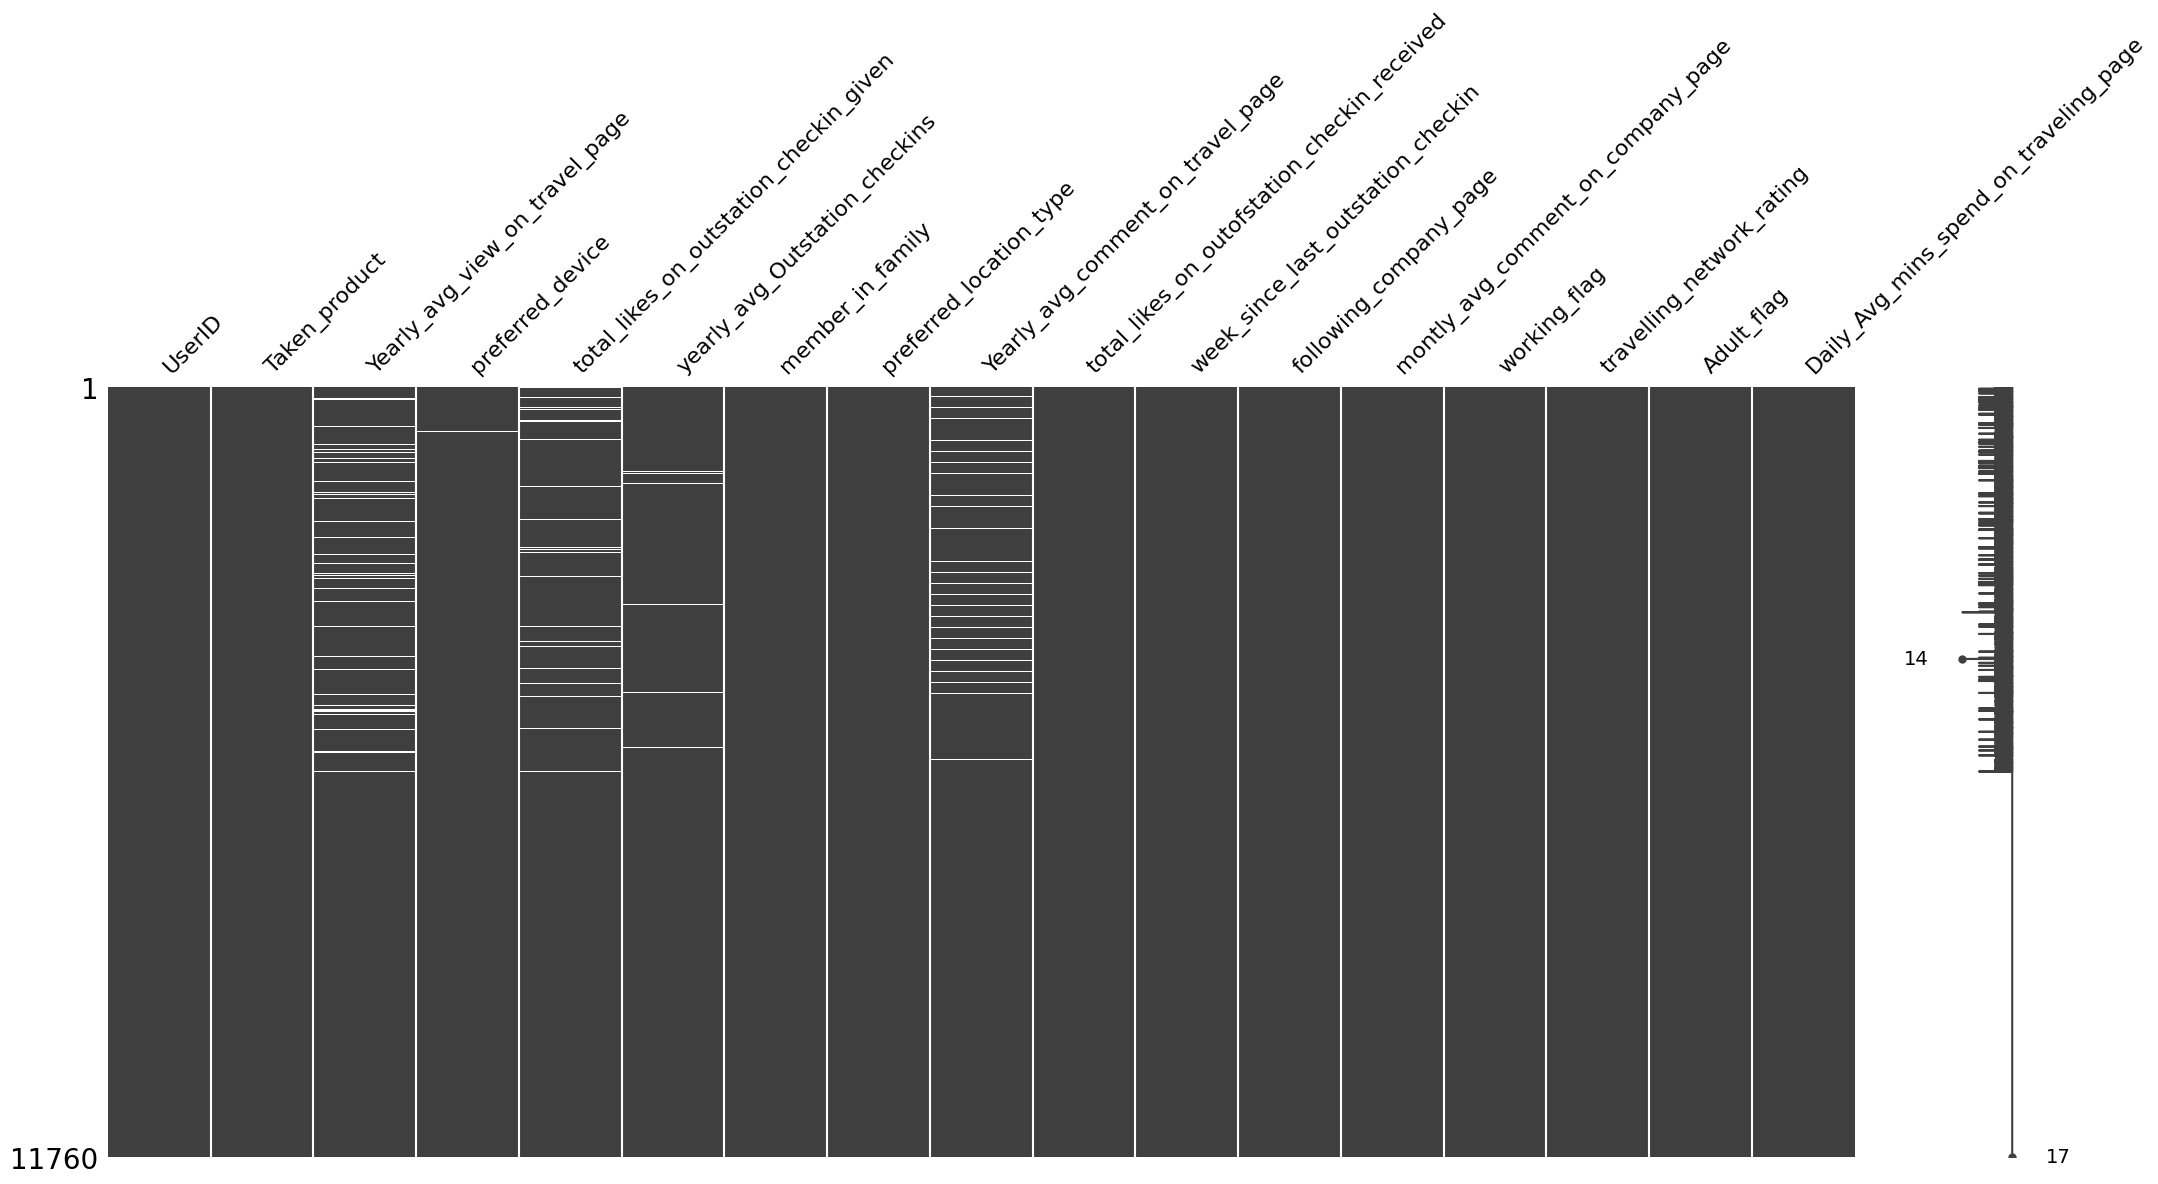

In [93]:
#Evaluar si hay valores nulos
msno.matrix(df)

Se detecta solo un valor nulo para la columna "preferred_device" por lo que se decide completarla con el valor moda "Tab".

Los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" dado que son valores de cantidad de interacciones del usuario con los sitios se decide reemplazar los nulos por 0.



In [94]:
#Reemplazar los nulos de la columna preferred_device por Tab dado que no representa impacto para el volumen de datos
df['preferred_device'] = df['preferred_device'].fillna('Tab')

In [95]:
#Reemplazar los nulos de las columnas "Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "yearly_avg_Outstation_checkins", "Yearly_avg_comment_on_travel_page" por 0 considerando el valor nulo como falta de interaccion
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].fillna(0)
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna(0)
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].fillna(0)


In [96]:
df['Taken_product'].value_counts(normalize=True)*100

,proportion
Taken_product,
0,83.877551
1,16.122449


Se observa que de la muestra estudiada, el 83% de los usuarios de los sitios de turismo no realizan la compra del viaje.
La muestra esta desbalaceada para realizar un análisis de clasificación asertivo.

# **Análisis exploratorio de datos**

Luego de la limpieza y estandarización de los datos, se procede a realizar el análisis exploratorio para una evalucaión del comportamiento de los datos de la muestra.

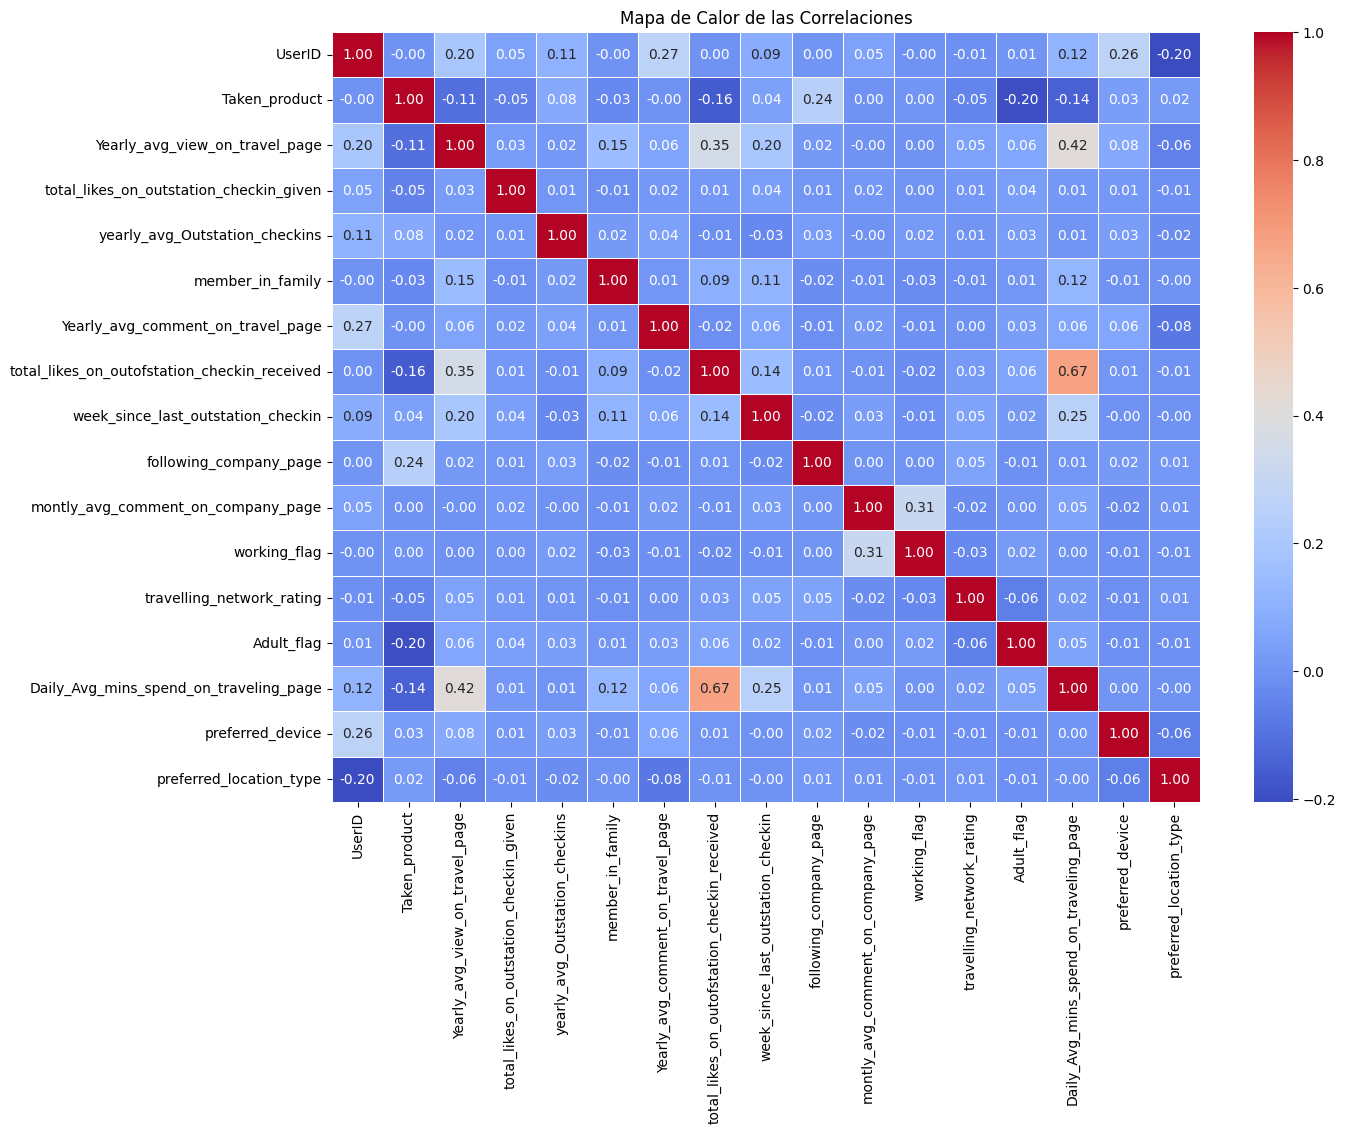

In [97]:
# Definir las columnas a codificar
features = ['preferred_device', 'preferred_location_type']

ordinal_encoder = OrdinalEncoder()
encoded_features = ordinal_encoder.fit_transform(df[features])
encoded_features_df = pd.DataFrame(encoded_features, columns=ordinal_encoder.get_feature_names_out(features))

# Seleccionar las columnas numéricas originales
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_features]

# Concatenar el DataFrame codificado con las columnas numéricas originales
df_encoded = pd.concat([df_numeric, encoded_features_df], axis=1)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

A partir del mapa de calor se observa una correlacion lineal positiva ente las personas que siguen el sitio web y efectivamente comprar el producto.
Tambien existe una correlacion entre la cantidad de miembros en la familia y el tiempo visitando sitios de viaje. Asi como tambien el tiempo visitando el sitio web muestra una correlación con la compra del producto.
Existe una correlacion entre los dispositivos utilizados y la locación preferida, pero esta correlación no resulta significativa para el analisis.

Ninguna de las variables presenta una correlación fuerte entre si, pero se puede ver el tiempo visitando los sitios, seguir el sitio web, la cantidad de miembros en la familia y la edad representan variables utiles para el analisis sobre turismo de este dataset.

In [98]:
# Crear el gráfico de pastel
fig = px.pie(df,
             names='preferred_device',
             title='Distribución de Dispositivos Preferidos',
             hole=0.3,  # Crear el círculo blanco en el centro
             color_discrete_map={'Mobile': 'lightblue', 'Desktop': 'steelblue'})  # Ajusta los colores según sea necesario

# Mostrar el porcentaje en cada porción
fig.update_traces(textinfo='label+percent',
                  textfont_size=14)

# Ajustar el diseño del gráfico
fig.update_layout(
    annotations=[dict(text='',
                      font_size=20,
                      showarrow=False,
                      x=0.5,
                      y=0.5)]
)

# Mostrar el gráfico
fig.show()


Los dispositivos preferidos para realizar busqueda de viajes son tablets y celuares tanto android como iphone.

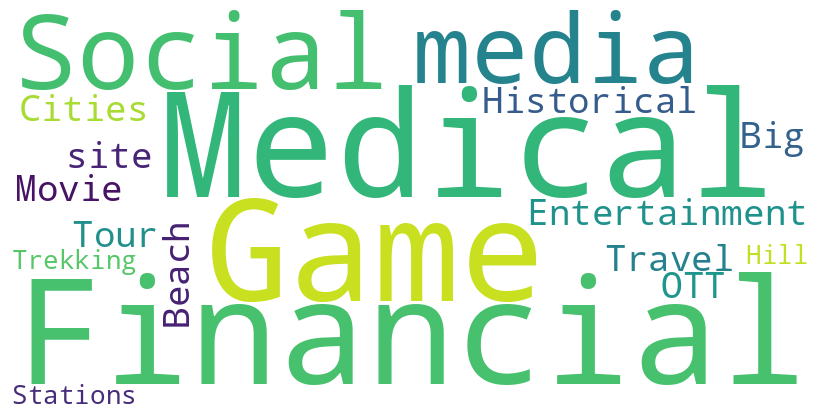

In [99]:
# Crear nube de palabras para ver las ubicaciones preferidas de viajes usando los valores de la columna preferred_location_type

from wordcloud import WordCloud

# Obtener los valores únicos de la columna 'preferred_location_type'
unique_locations = df['preferred_location_type'].unique()

# Crear una cadena de texto con los valores únicos
text = " ".join(str(location) for location in unique_locations)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Los motivos de viaje más frecuentes son financieros, médicos y por juego/esparcimiento.

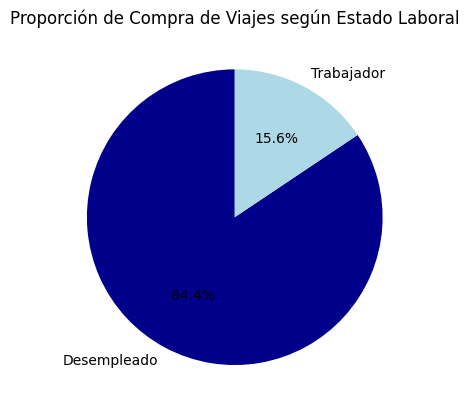

In [100]:
# Crear una copia de los valores de 'working_flag' solo para el gráfico
working_purchase = df[df['Taken_product'] == 1]['working_flag'].replace({0: 'Desempleado', 1: 'Trabajador'}).value_counts()

# Graficar la proporción de compra de viajes según el estado laboral con colores personalizados
working_purchase.plot.pie(autopct='%1.1f%%', startangle=90, colors=['darkblue', 'lightblue'])

plt.title('Proporción de Compra de Viajes según Estado Laboral')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para el gráfico de torta
plt.show()



El gráfico de torta indica que los clientes que no cuentan con empleo formal tienen una mayor tendencia a adquirir viajes en comparación con aquellos que se encuentran en situación de empleo activo.

In [101]:
# Agrupar los datos y calcular las proporciones
prop = df.groupby('preferred_device', observed=False)['Taken_product'].value_counts(normalize=True).unstack()
prop.columns = ['No', 'Sí']

# Convertir el DataFrame a un formato adecuado para Plotly
prop_reset = prop.reset_index().melt(id_vars='preferred_device', value_vars=['No', 'Sí'],
                                     var_name='Decisión de Compra', value_name='Proporción')

# Crear el gráfico de barras apiladas
fig = px.bar(prop_reset,
             x='preferred_device',
             y='Proporción',
             color='Decisión de Compra',
             text='Proporción',
             color_discrete_map={'No': 'lightblue', 'Sí': 'steelblue'},  # Colores discretos en tonos de azul
             labels={'preferred_device': 'Dispositivo Preferido', 'Proporción': 'Proporción', 'Decisión de Compra': 'Decisión de Compra'},
             title='Proporción de Compra de Viajes según Dispositivo Preferido',
             barmode='stack')

# Personalizar el texto sobre las barras
fig.update_traces(texttemplate='%{text:.2%}',
                  textfont=dict(size=12, color='black'))

fig.update_traces(texttemplate='<b>%{text:.2%}</b>',  # Texto en negrita
                  textfont=dict(size=12, color='black'))

fig.update_layout(
    legend_title_text='Decisión de Compra',
    legend=dict(
        title='Decisión de Compra',
        itemsizing='constant',
        x=1.15,
        y=1
    ),
)

fig.show()


El gráfico de proporciones muestra que los mayores porcentajes de compras de viajes se registran a través de computadoras, dispositivos iOS, y en la categoría de "Otros", que abarca medios no digitales.

In [102]:
# Agrupar los datos según travelling_network_rating y taken_product
df_grouped = df.groupby(['travelling_network_rating', 'Taken_product']).size().unstack(fill_value=0)

# Cambiar los nombres de las columnas para que en lugar de 0 y 1 diga 'No' y 'Sí'
df_grouped.columns = ['No', 'Sí']

# Convertir los datos a formato long para Plotly
df_grouped_long = df_grouped.reset_index().melt(id_vars='travelling_network_rating',
                                                value_vars=['No', 'Sí'],
                                                var_name='Compraron un viaje',
                                                value_name='Cantidad')

# Calcular el total por 'travelling_network_rating'
df_grouped_long['Total'] = df_grouped_long.groupby('travelling_network_rating')['Cantidad'].transform('sum')

# Calcular los porcentajes para cada barra
df_grouped_long['Porcentaje'] = (df_grouped_long['Cantidad'] / df_grouped_long['Total'] * 100).round(2)

# Crear el gráfico de barras apiladas
fig = px.bar(df_grouped_long,
             x='travelling_network_rating',
             y='Cantidad',
             color='Compraron un viaje',
             color_discrete_map={'No': 'lightblue', 'Sí': 'steelblue'},
             text='Porcentaje',
             title='Relación entre la red de contactos viajeros y la compra de un viaje',
             labels={'travelling_network_rating': 'Rating de la red de contactos viajeros',
                     'Cantidad': 'Cantidad de contactos'},
             barmode='stack')

# Actualizar el texto en el gráfico con los porcentajes
fig.update_traces(texttemplate='<b>%{text:.2f}%</b>',
                  textfont=dict(size=12, color='black'))

# Ajustar el diseño
fig.update_layout(
    legend_title_text='Compraron un viaje',
    xaxis_title='Rating de la red de contactos viajeros',
    yaxis_title='Cantidad de contactos',
    xaxis=dict(tickangle=0),
    title_x=0.5,
    title_y=0.95
)

# Mostrar el gráfico
fig.show()


El gráfico de densidad revela que las conexiones sociales relacionadas con los viajeros presentan una cierta relación con la decisión de compra de viajes. Sin embargo, esta relación no parece ser un factor determinante en la decisión de compra.

In [103]:
# Cambiar los valores de following_company_page a "Sí" y "No"
df['following_company_page'] = df['following_company_page'].replace({1: 'Sí', 0: 'No'})

# Crear el gráfico con facetas y apilar los histogramas
fig = px.histogram(df,
                   x='Taken_product',
                   facet_col='following_company_page',
                   color='Taken_product',
                   category_orders={'Taken_product': [0, 1]},
                   color_discrete_map={0: 'lightblue', 1: 'steelblue'},
                   labels={'Taken_product': 'Decisión de Compra'},
                   title='Distribución de Compra de Viajes según Seguimiento de la Página Web',
                   facet_col_wrap=2,
                   barmode='stack')

# Actualizar las etiquetas del eje x
fig.for_each_xaxis(lambda xaxis: xaxis.update(
    tickvals=[0, 1],
    ticktext=['No', 'Sí']
))

# Ajustar los títulos de las facetas
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("following_company_page=", "Seguimiento: ")))

# Mostrar el gráfico
fig.show()


In [104]:
# Agrupar los datos según following_company_page y Taken_product
df_grouped = df.groupby(['following_company_page', 'Taken_product']).size().unstack(fill_value=0)

# Cambiar los nombres de las columnas para que en lugar de 0 y 1 diga 'No' y 'Sí'
df_grouped.columns = ['No', 'Sí']

df_grouped_long = df_grouped.reset_index().melt(id_vars='following_company_page',
                                                value_vars=['No', 'Sí'],
                                                var_name='Compraron un viaje',
                                                value_name='Cantidad')

df_grouped_long['Total'] = df_grouped_long.groupby('following_company_page')['Cantidad'].transform('sum')

# Calcular los porcentajes para cada barra
df_grouped_long['Porcentaje'] = (df_grouped_long['Cantidad'] / df_grouped_long['Total'] * 100).round(2)

fig = go.Figure()

# Añadir las barras para cada categoría
for label in ['No', 'Sí']:
    df_label = df_grouped_long[df_grouped_long['Compraron un viaje'] == label]
    fig.add_trace(go.Bar(
        x=df_label['following_company_page'],
        y=df_label['Cantidad'],
        name=label,
        text=df_label['Porcentaje'].apply(lambda x: f'<b>{x:.2f}%</b>'),
        textposition='inside',
        marker_color='lightblue' if label == 'No' else 'steelblue'
    ))

fig.update_layout(
    barmode='stack',
    title='Relación entre seguidores del sitio y la compra de un viaje',
    xaxis_title='Seguidor del sitio',
    yaxis_title='Cantidad de seguidores',
    xaxis=dict(tickangle=0),
    legend_title='Compraron un viaje',
    title_x=0.5,
    title_y=0.95,
    showlegend=True
)

fig.show()


Es más probable que concreten la compra los seguidores de la página web respecto a los que no son seguidores, pero tambien se evidencia que la suscripción al sitio web no asegura la compra de viajes. Asimismo, se observa una cantidad significativamente mayor de personas que visitan las páginas web sin suscribirse ni seguir el sitio.

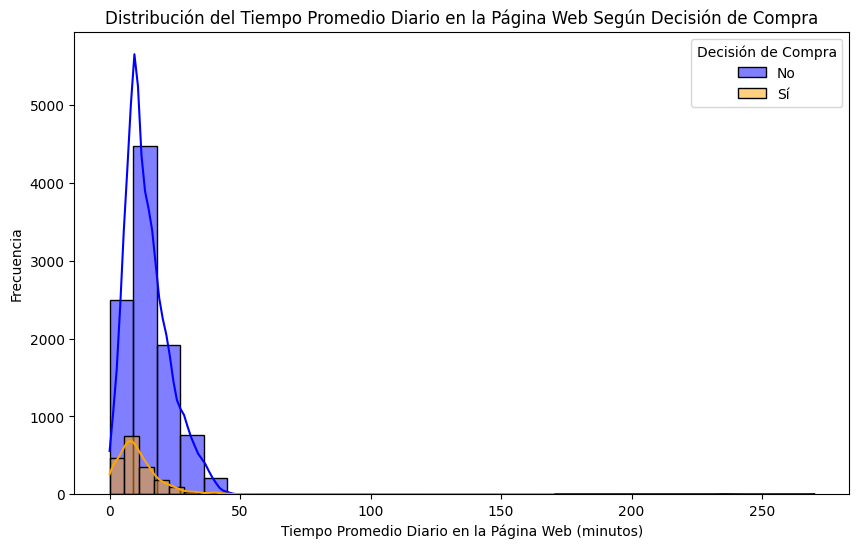

In [105]:
plt.figure(figsize=(10, 6))

# Crear histogramas superpuestos
sns.histplot(df[df['Taken_product'] == 0]['Daily_Avg_mins_spend_on_traveling_page'], color='blue', label='No', kde=True, bins=30)
sns.histplot(df[df['Taken_product'] == 1]['Daily_Avg_mins_spend_on_traveling_page'], color='orange', label='Sí', kde=True, bins=30)

# Ajustar títulos y etiquetas
plt.title('Distribución del Tiempo Promedio Diario en la Página Web Según Decisión de Compra')
plt.xlabel('Tiempo Promedio Diario en la Página Web (minutos)')
plt.ylabel('Frecuencia')
plt.legend(title='Decisión de Compra')
plt.show()


El histograma revela que los individuos que pasan más tiempo en el sitio web tienden a realizar menos compras, mientras que aquellos que navegan por menos tiempo tienen una mayor propensión a efectuar una compra. Esto sugiere una posible decisión de compra previa entre los usuarios que navegan menos.

In [106]:
# Crear el histograma
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df['member_in_family'],
    nbinsx=int(df['member_in_family'].max()) + 1,
    marker_color='darkblue',
    opacity=0.75,
    histnorm='',
    showlegend=False
))

fig.update_layout(
    title='Histograma de Miembros en la Familia para Compradores de Viajes',
    xaxis_title='Cantidad de Miembros en la Familia',
    yaxis_title='Frecuencia',
    xaxis=dict(
        tickmode='linear',
        tickvals=list(range(int(df['member_in_family'].max()) + 1))
    ),
    title_x=0.5
)

fig.show()


El histograma muestra que, entre los compradores de viajes, la mayoría proviene de familias con entre 3 integrantes.

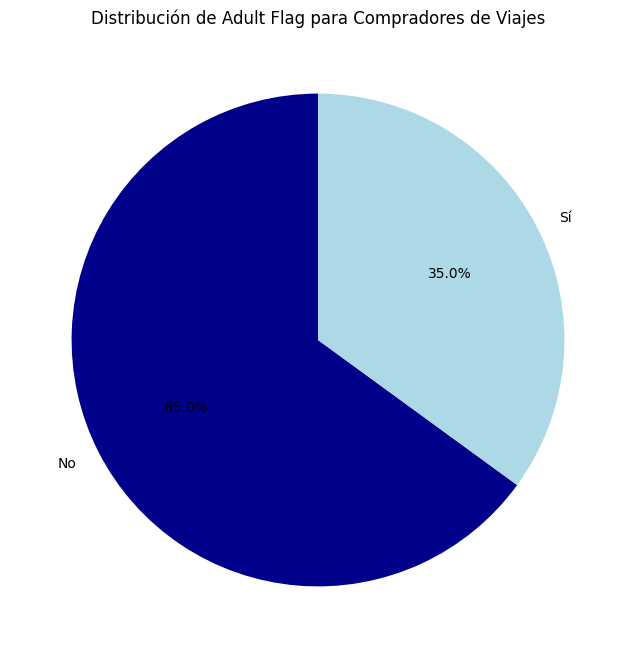

In [107]:
plt.figure(figsize=(8, 8))

# Datos para gráfico de pastel
prop = df[df['Taken_product'] == 1]['Adult_flag'].value_counts()
prop.plot.pie(autopct='%1.1f%%', colors=['darkblue', 'lightblue'], labels=['No', 'Sí'], startangle=90)

# Ajustar título
plt.title('Distribución de Adult Flag para Compradores de Viajes')
plt.ylabel('')
plt.show()


De los datos obtenidos, se observa que la mayoría de los usuarios menores de edad son los que realizan la mayoría de las compras.

# ***Insights***
- Los dispositivos móviles son los más elegidos para la compra de viajes
- Los jóvenes son quienes más compras realizan
- El tiempo de navegación en el sitio no garantiza la compra
- Las familias representan la mayor cantidad de compradores de viajes

# ***Recomendaciones***
- Crear perfiles de usuarios para marketing asertivo
- Facilitar la búsqueda en función de las preferencias de usuario para que encuentre rápidamente lo que busca
- El sitio web debe tener una interfaz adaptable a los distintos dispositivos

# *Referencias*

Dataset Keaggle: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal

Proyecto Github: https://github.com/melirandazzo/trabajo_ciencia_datos/blob/main/Preentrega_Proyecto_Final-Melina_Randazzo.ipynb

Informe Ejecutivo: https://github.com/melirandazzo/trabajo_ciencia_datos/blob/main/Preentrega_Poryecto_Final_Informe_Ejecutivo_Randazzo.pdf


# Feature Importance con Modelos Basados en Árboles

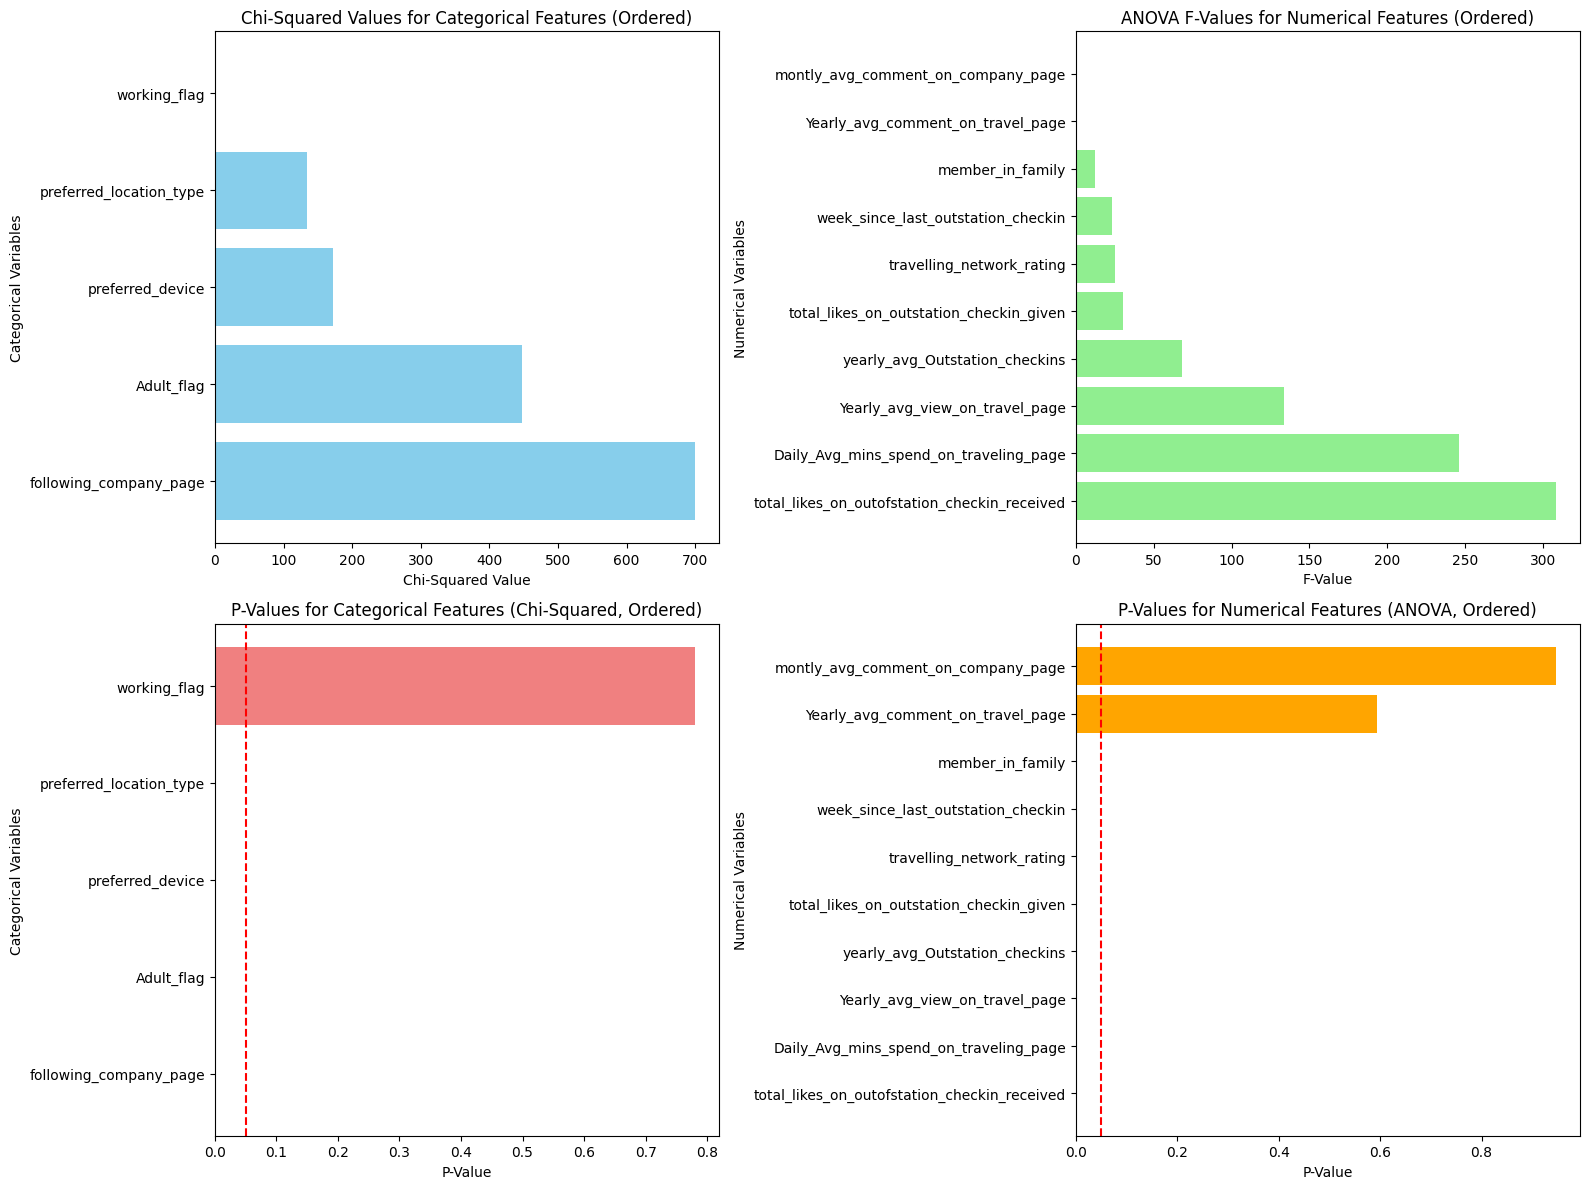

In [108]:
# Columnas categóricas y numéricas
categorical_columns = ['preferred_device', 'preferred_location_type', 'working_flag', 'Adult_flag', 'following_company_page']
numerical_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins',
                     'member_in_family', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received',
                     'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating',
                     'Daily_Avg_mins_spend_on_traveling_page']

# Inicializar listas para almacenar los resultados
chi2_values = []
p_values_chi2 = []
anova_f_values = []
p_values_anova = []

# Calcular chi2 y p-values para cada variable categórica
for feature in categorical_columns:
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[feature], df['Taken_product']))
    chi2_values.append(chi2)
    p_values_chi2.append(p)

# Calcular ANOVA y p-values para cada variable numérica
for feature in numerical_columns:
    groups = [df[df['Taken_product'] == label][feature].dropna() for label in df['Taken_product'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_f_values.append(f_stat)
    p_values_anova.append(p_val)

# Convertir los resultados en DataFrames para ordenarlos
chi2_df = pd.DataFrame({'Feature': categorical_columns, 'Chi2': chi2_values, 'P-Value': p_values_chi2})
anova_df = pd.DataFrame({'Feature': numerical_columns, 'F-Value': anova_f_values, 'P-Value': p_values_anova})

# Ordenar los valores de chi-cuadrado y ANOVA en orden descendente
chi2_df_sorted = chi2_df.sort_values(by='Chi2', ascending=False)
anova_df_sorted = anova_df.sort_values(by='F-Value', ascending=False)

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot de los valores de chi-cuadrado ordenados
axes[0, 0].barh(chi2_df_sorted['Feature'], chi2_df_sorted['Chi2'], color='skyblue')
axes[0, 0].set_title('Chi-Squared Values for Categorical Features (Ordered)')
axes[0, 0].set_xlabel('Chi-Squared Value')
axes[0, 0].set_ylabel('Categorical Variables')

# Plot de los p-values de chi-cuadrado ordenados
axes[1, 0].barh(chi2_df_sorted['Feature'], chi2_df_sorted['P-Value'], color='lightcoral')
axes[1, 0].axvline(x=0.05, color='red', linestyle='--')  # Línea para el umbral de significancia (p < 0.05)
axes[1, 0].set_title('P-Values for Categorical Features (Chi-Squared, Ordered)')
axes[1, 0].set_xlabel('P-Value')
axes[1, 0].set_ylabel('Categorical Variables')

# Plot de los valores F de ANOVA ordenados
axes[0, 1].barh(anova_df_sorted['Feature'], anova_df_sorted['F-Value'], color='lightgreen')
axes[0, 1].set_title('ANOVA F-Values for Numerical Features (Ordered)')
axes[0, 1].set_xlabel('F-Value')
axes[0, 1].set_ylabel('Numerical Variables')

# Plot de los p-values de ANOVA ordenados
axes[1, 1].barh(anova_df_sorted['Feature'], anova_df_sorted['P-Value'], color='orange')
axes[1, 1].axvline(x=0.05, color='red', linestyle='--')  # Línea para el umbral de significancia (p < 0.05)
axes[1, 1].set_title('P-Values for Numerical Features (ANOVA, Ordered)')
axes[1, 1].set_xlabel('P-Value')
axes[1, 1].set_ylabel('Numerical Variables')

# Ajustar el layout
plt.tight_layout()
plt.show()

# Correlación con la Variable Objetivo (Para Modelos Lineales)

In [109]:
correlation_with_target = df_encoded.corr()['Taken_product'].sort_values(ascending=False)
print(correlation_with_target)


Taken_product                                   1.000000
following_company_page                          0.244244
yearly_avg_Outstation_checkins                  0.075884
week_since_last_outstation_checkin              0.044725
preferred_device                                0.031743
preferred_location_type                         0.023868
working_flag                                    0.002889
montly_avg_comment_on_company_page              0.000618
UserID                                         -0.001296
Yearly_avg_comment_on_travel_page              -0.004910
member_in_family                               -0.032282
travelling_network_rating                      -0.045993
total_likes_on_outstation_checkin_given        -0.050926
Yearly_avg_view_on_travel_page                 -0.105956
Daily_Avg_mins_spend_on_traveling_page         -0.143238
total_likes_on_outofstation_checkin_received   -0.159824
Adult_flag                                     -0.195342
Name: Taken_product, dtype: flo

# Selección de Atributos con RFE (Recursive Feature Elimination)

In [110]:
X = df_encoded.drop('Taken_product', axis=1)  # Features (sin la columna objetivo)
y = df_encoded['Taken_product']  # Variable objetivo

# Inicializar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

selector = RFE(estimator=model, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Características seleccionadas por RFE:", selected_features)


Características seleccionadas por RFE: Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')


*Las columnas más relevantes para entrenar el modelo según el análisis son: 'following_company_page', 'Adult_flag', 'preferred_device', 'total_likes_on_outofstation_checkin_received',
'Daily_Avg_mins_spend_on_traveling_page', 'Yearly_avg_view_on_travel_page'*

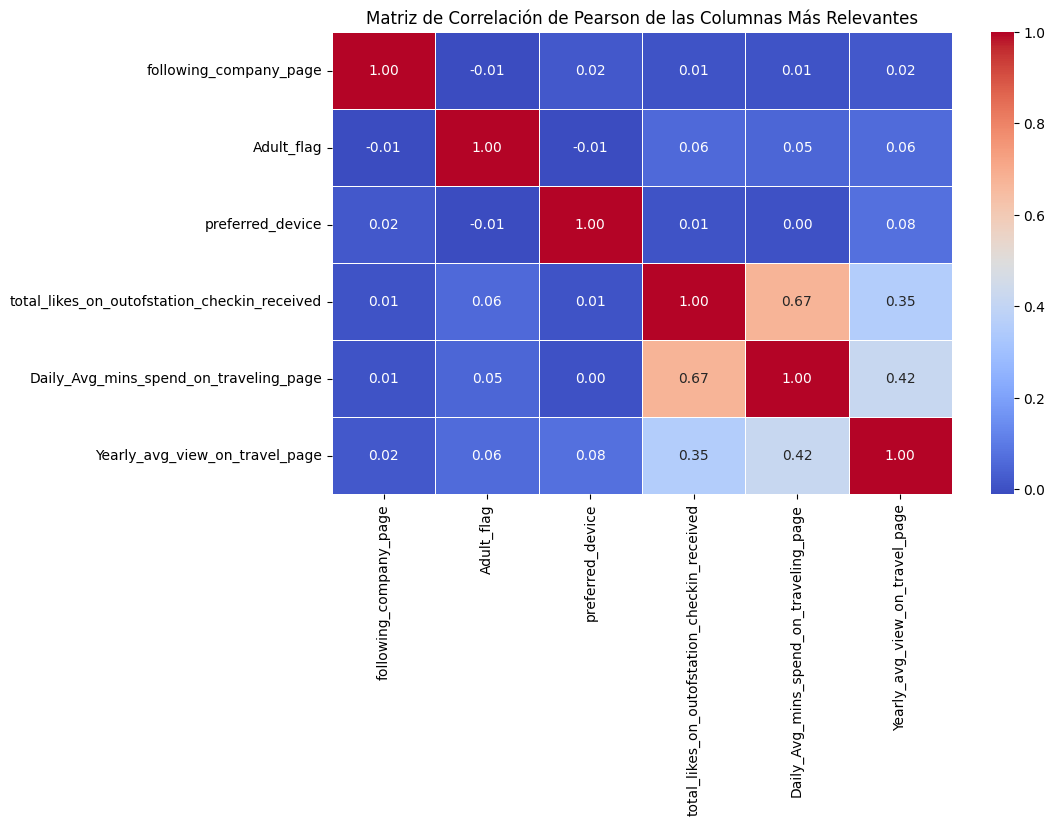

In [111]:
# Crear una copia del DataFrame original
df_relevant = df[['following_company_page', 'Adult_flag', 'preferred_device',
                  'total_likes_on_outofstation_checkin_received', 'Daily_Avg_mins_spend_on_traveling_page',
                  'Yearly_avg_view_on_travel_page']].copy()

# Codificar las columnas categóricas
le = LabelEncoder()

# Codificar 'following_company_page', 'Adult_flag' y 'preferred_device'
df_relevant['following_company_page'] = le.fit_transform(df_relevant['following_company_page'])
df_relevant['Adult_flag'] = le.fit_transform(df_relevant['Adult_flag'])
df_relevant['preferred_device'] = le.fit_transform(df_relevant['preferred_device'])

# Calcular la matriz de correlación de Pearson
pearson_corr_matrix = df_relevant.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Pearson de las Columnas Más Relevantes')
plt.show()


In [112]:
X = df_relevant
X = X.fillna(X.mean())
y = df['Taken_product']
# Dividir en train y test sets (ej: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [113]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2352 entries, 5271 to 4581
Series name: Taken_product
Non-Null Count  Dtype
--------------  -----
2352 non-null   int64
dtypes: int64(1)
memory usage: 36.8 KB


In [114]:
# Diccionario de modelos de clasificacion
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

model_names = []
accuracies = []

# Entrenamiento y evaluacion
for name, clf in classification_models.items():
    clf.fit(X_train, y_train) # datos de entrenamiento
    score = clf.score(X_test, y_test) # evaluando los modelos
    model_names.append(name)
    accuracies.append(score)

In [115]:
# Crear un dataframe para evaluar el rendimiento (benchmark)
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

In [116]:
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"El mejor modelo es: {best_model_name} con {(accuracies[best_index]*100):.2f}%")

El mejor modelo es: Decision Tree con 95.66%


In [117]:
df_synthetic = df_relevant.copy()

# Crear variables sintéticas

# 1. Producto entre Daily_Avg_mins_spend_on_traveling_page y Yearly_avg_view_on_travel_page
df_synthetic['daily_yearly_interaction'] = df_synthetic['Daily_Avg_mins_spend_on_traveling_page'] * df_synthetic['Yearly_avg_view_on_travel_page']

# 2. Logaritmo de total_likes_on_outofstation_checkin_received
df_synthetic['log_total_likes'] = np.log1p(df_synthetic['total_likes_on_outofstation_checkin_received'])

# 3. Proporción de likes sobre vistas anuales
df_synthetic['likes_per_yearly_view'] = df_synthetic['total_likes_on_outofstation_checkin_received'] / df_synthetic['Yearly_avg_view_on_travel_page']

# 4. Binarizar Daily_Avg_mins_spend_on_traveling_page (tiempo alto/bajo)
df_synthetic['high_daily_time'] = np.where(df_synthetic['Daily_Avg_mins_spend_on_traveling_page'] > df_synthetic['Daily_Avg_mins_spend_on_traveling_page'].median(), 1, 0)

# 5. Crear un ratio entre total_likes_on_outofstation_checkin_received y Yearly_avg_view_on_travel_page
df_synthetic['Likes_View_Ratio'] = df_synthetic['total_likes_on_outofstation_checkin_received'] / (df_synthetic['Yearly_avg_view_on_travel_page'] + 1)

#Corregir valores infinitos
df_synthetic.replace([np.inf, -np.inf], np.nan, inplace=True)

for column in df_synthetic.columns:
    df_synthetic[column].fillna(df_synthetic[column].median(), inplace=True)

# Mostrar las primeras filas
df_synthetic.head()

,following_company_page,Adult_flag,preferred_device,total_likes_on_outofstation_checkin_received,Daily_Avg_mins_spend_on_traveling_page,Yearly_avg_view_on_travel_page,daily_yearly_interaction,log_total_likes,likes_per_yearly_view,high_daily_time,Likes_View_Ratio
0,1,0,2,5993,8.0,307.0,2456.0,8.698514,19.521173,0,19.457792
1,0,1,5,5130,10.0,367.0,3670.0,8.543056,13.978202,0,13.940217
2,1,0,2,2090,7.0,277.0,1939.0,7.645398,7.545126,0,7.517986
3,1,0,5,2909,8.0,247.0,1976.0,7.975908,11.777328,0,11.729839
4,0,1,2,3468,6.0,202.0,1212.0,8.151622,17.168317,0,17.083744


In [141]:
# Definir la variable objetivo y las características
X = df_synthetic
y = df['Taken_product'].astype(int)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [142]:
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"El mejor modelo es: {best_model_name} con {(accuracies[best_index]*100):.2f}%")

El mejor modelo es: Decision Tree con 95.66%


In [153]:
# Entrenar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2953
           1       0.95      0.78      0.86       575

    accuracy                           0.96      3528
   macro avg       0.95      0.89      0.92      3528
weighted avg       0.96      0.96      0.96      3528



In [154]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
train_accuracy_rf = rf_model.score(X_train, y_train)
test_accuracy_rf = rf_model.score(X_test, y_test)

**Precision:**
- Para la clase 0: 0.96
- Para la clase 1: 0.95

Esto indica que el modelo es muy preciso en identificar ambas clases, especialmente en la clase 0.

**Recall:**
- Para la clase 0: 0.99
- Para la clase 1: 0.78

El recall para la clase 1 es relativamente bajo. Esto significa que el modelo está perdiendo algunos casos positivos, lo que podría sugerir un problema de underfitting para la clase positiva (1).

**F1-Score:**
- Para la clase 0: 0.98
- Para la clase 1: 0.86

El f1-score de 1 también es menor en comparación con 0, lo que indica que, aunque el modelo funciona bien para la mayoría de los casos, no está capturando adecuadamente todos los positivos.

**Accuracy:**
La precisión total del modelo es de 0.96, lo que sugiere que el modelo tiene un buen desempeño general, pero esto puede ser engañoso si la clase 1 es menos representativa.

**Overfitting:** En este caso, no parece que este modelo esté sobreajustado, ya que la precisión y el recall en el conjunto de prueba son bastante buenos.

**Underfitting:** La baja capacidad de recall en la clase 1 sugiere que el modelo podría estar subajustando en relación a esta clase.

**Bias Alto:** El modelo no está capturando adecuadamente la complejidad de los datos, lo que lleva a errores sistemáticos en las predicciones. En este caso, el bajo recall para la clase 1 puede ser un indicativo de un sesgo alto.

**Variance Alto:** Este modelo parece tener un buen equilibrio, ya que la precisión general es alta.

*El modelo Random Forest parece estar experimentando un cierto grado de underfitting para la clase positiva (1), lo que se traduce en un sesgo alto. Esto significa que el modelo no está capturando adecuadamente todos los patrones en los datos, especialmente en lo que respecta a la identificación de los casos positivos.*

In [151]:
# Definir el modelo Decision Tree sin hiperparámetros específicos
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dt_model.fit(X_train, y_train)

# Predecir los resultados en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Decision Tree Classification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2953
           1       0.83      0.84      0.83       575

    accuracy                           0.95      3528
   macro avg       0.90      0.90      0.90      3528
weighted avg       0.95      0.95      0.95      3528



In [152]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
train_accuracy_dt = dt_model.score(X_train, y_train)
test_accuracy_dt = dt_model.score(X_test, y_test)

**Precision:**
- Para la clase 0: 0.97
- Para la clase 1: 0.83

La precisión para la clase 0 es alta, lo que indica que el modelo es eficaz en identificar correctamente los negativos. Sin embargo, la precisión para la clase 1 es menor, lo que significa que algunos de los casos que el modelo clasificó como positivos no son realmente positivos.

**Recall:**
- Para la clase 0: 0.97
- Para la clase 1: 0.84

El recall para la clase 1 también es inferior, lo que indica que el modelo ha perdido algunos casos positivos. Esto sugiere un underfitting similar al que vimos con el modelo de Random Forest.

**F1-Score:**
- Para la clase 0: 0.97
- Para la clase 1: 0.83

El f1-score para la clase 1 también es bajo en comparación con 0, lo que refuerza la idea de que el modelo no está capturando adecuadamente la clase positiva.

**Accuracy:** La precisión total del modelo es de 0.95, lo que indica un buen desempeño general, aunque, como en el caso anterior, podría ser engañoso si la clase 1 es menos representativa.

**Overfitting:** No parece ser un problema en este caso, ya que el modelo no muestra signos de un rendimiento bajo en el conjunto de prueba en comparación con el conjunto de entrenamiento.

**Underfitting:** Similar al modelo de Random Forest, este modelo parece estar subajustando en relación a la clase positiva (1). El recall de 0.84 sugiere que el modelo no está capturando todos los casos positivos disponibles.

**Bias Alto:** La baja precisión y recall para la clase 1 pueden ser un indicativo de que el modelo tiene un sesgo alto. El modelo podría no ser lo suficientemente complejo para capturar adecuadamente los patrones de los datos, especialmente para los casos positivos.

**Variance Bajo:** El modelo parece tener una buena estabilidad y generalización en cuanto a la clase 0, lo que sugiere una baja varianza.

*El modelo de Decision Tree también presenta underfitting, como se observa en el recall y f1-score para la clase positiva (1).*

In [149]:
# Entrenar Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2953
           1       0.68      0.23      0.34       575

    accuracy                           0.86      3528
   macro avg       0.77      0.60      0.63      3528
weighted avg       0.84      0.86      0.83      3528



In [155]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
train_accuracy_lr = lr_model.score(X_train, y_train)
test_accuracy_lr = lr_model.score(X_test, y_test)

**Precision:**
- Para la clase 0: 0.87
- Para la clase 1: 0.68

La precisión para la clase 0 es bastante buena, indicando que el modelo identifica correctamente los casos negativos en su mayoría. Sin embargo, la precisión para la clase 1 es inferior, lo que sugiere que el modelo tiene dificultad para clasificar correctamente los positivos.

**Recall:**
- Para la clase 0: 0.98
- Para la clase 1: 0.23

Aquí, el recall para la clase 1 es muy bajo, lo que significa que el modelo ha perdido muchos casos positivos. Esto es un claro indicativo de underfitting.

**F1-Score:**
- Para la clase 0: 0.92
- Para la clase 1: 0.34

El f1-score para la clase 1 es muy bajo, lo que refuerza la idea de que el modelo no está capturando adecuadamente la clase positiva.

**Accuracy:** La precisión total del modelo es de 0.86, lo que es aceptable, pero podría ser engañoso si se considera que el modelo tiene un rendimiento significativamente inferior para la clase positiva.

**Overfitting:** No parece ser un problema aquí, ya que el modelo tiene un rendimiento relativamente uniforme entre el conjunto de entrenamiento y el de prueba, pero el desempeño en la clase positiva es preocupante.

**Underfitting:** Este modelo muestra signos claros de underfitting en relación a la clase positiva (1). La baja precisión, recall y f1-score para esta clase sugieren que el modelo no está capturando adecuadamente los patrones de los datos para la clase positiva.

**Bias Alto:** La baja precisión y recall para la clase 1 pueden ser indicativas de un alto sesgo en el modelo. Esto sugiere que el modelo es demasiado simple y no está capturando la complejidad necesaria de los datos.

**Variance Bajo:** El modelo parece ser bastante estable, con buenos resultados en la clase 0, lo que indica que tiene una baja varianza.

*El modelo de Logistic Regression presenta underfitting, especialmente en la clase positiva (1). La baja puntuación en el recall y f1-score para esta clase indica que el modelo no está capturando adecuadamente los casos positivos, lo que puede ser resultado de un sesgo alto.*

In [156]:
# Configurar el modelo K-Nearest Neighbors
knn = KNeighborsClassifier()

# Definir el rango de hiperparámetros para buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)

print(f'Precisión del modelo KNN con mejores hiperparámetros: {accuracy:.2f}')
print(f'Mejores hiperparámetros: {grid_search.best_params_}')


Precisión del modelo KNN con mejores hiperparámetros: 0.89
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [157]:
# Evaluar el modelo
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2953
           1       0.83      0.84      0.83       575

    accuracy                           0.95      3528
   macro avg       0.90      0.90      0.90      3528
weighted avg       0.95      0.95      0.95      3528



In [158]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
train_accuracy_knn = best_knn.score(X_train, y_train)
test_accuracy_knn = best_knn.score(X_test, y_test)

**Precision:**
- Para la clase 0: 0.92
- Para la clase 1: 0.74

La precisión para la clase 0 es buena, indicando que el modelo identifica correctamente la mayoría de los casos negativos. Sin embargo, la precisión para la clase 1 es menor, lo que sugiere que el modelo tiene dificultades para clasificar correctamente los positivos.

**Recall:**
- Para la clase 0: 0.96
- Para la clase 1: 0.54

El recall para la clase 1 es bajo, lo que significa que el modelo ha perdido una cantidad considerable de casos positivos. Esto también es un indicativo de underfitting en esta clase.

**F1-Score:**
- Para la clase 0: 0.94
- Para la clase 1: 0.63

El f1-score para la clase 1 es considerablemente bajo, lo que refuerza la idea de que el modelo no está capturando adecuadamente la clase positiva.

**Accuracy:** La precisión total del modelo es de 0.89, lo cual es bastante bueno, pero puede ser engañoso si consideramos el bajo desempeño en la clase positiva.

**Overfitting:** No parece ser un problema aquí, ya que el modelo tiene un rendimiento relativamente uniforme entre el conjunto de entrenamiento y el de prueba. Sin embargo, el rendimiento en la clase positiva sigue siendo preocupante.

**Underfitting:** El modelo muestra signos de underfitting en relación a la clase positiva (1). La baja precisión, recall y f1-score para esta clase sugieren que el modelo no está capturando adecuadamente los patrones de los datos para la clase positiva.

**Bias Alto:** La baja precisión y recall para la clase 1 pueden ser indicativas de un alto sesgo en el modelo. Esto sugiere que el modelo es demasiado simple o que no está aprovechando adecuadamente la información de los datos.

**Variance Bajo:** El modelo parece ser relativamente estable con un buen rendimiento en la clase 0, lo que indica que tiene una baja varianza.

*El modelo de K-Nearest Neighbors presenta underfitting, especialmente en la clase positiva (1). La baja puntuación en el recall y f1-score para esta clase indica que el modelo no está capturando adecuadamente los casos positivos, lo que puede ser resultado de un sesgo alto.*

In [159]:
# Definir el modelo SVM sin hiperparámetros específicos
svm_model = SVC(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir los resultados en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_svm)

# Evaluar el modelo
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2953
           1       0.83      0.84      0.83       575

    accuracy                           0.95      3528
   macro avg       0.90      0.90      0.90      3528
weighted avg       0.95      0.95      0.95      3528



In [160]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
train_accuracy_svm = svm_model.score(X_train, y_train)
test_accuracy_svm = svm_model.score(X_test, y_test)

**Precision:**
- Para la clase 0: 0.84
- Para la clase 1: 0.00

La precisión para la clase 1 es cero, lo que significa que el modelo no ha identificado correctamente ningún caso positivo. Esto es un fuerte indicativo de underfitting en esta clase.

**Recall:**
- Para la clase 0: 1.00
- Para la clase 1: 0.00

El recall de 1 también es cero, indicando que el modelo no detecta ninguna instancia de la clase positiva. Esto refuerza la conclusión de que el modelo no está capturando correctamente los patrones de los datos para la clase positiva.

**F1-Score:**
- Para la clase 0: 0.91
- Para la clase 1: 0.00

El f1-score para la clase positiva es cero, lo que indica que no hay ningún equilibrio entre la precisión y el recall, lo que nuevamente sugiere que el modelo no está haciendo un buen trabajo en identificar la clase positiva.

**Accuracy:** La precisión total del modelo es de 0.84, que parece aceptable, pero se ve influenciada por el alto rendimiento en la clase negativa y el mal desempeño en la clase positiva.

**Overfitting:** No parece ser un problema aquí, ya que el modelo está fallando en detectar la clase positiva. La falta de detección sugiere que el modelo no es lo suficientemente complejo o que no está ajustando bien los datos.

**Underfitting:** El modelo muestra signos de underfitting en relación a la clase positiva (1). La baja precisión, recall y f1-score para esta clase indican que el modelo no ha aprendido adecuadamente a clasificar los datos de esta clase.

**Bias Alto:** La incapacidad del modelo para detectar cualquier caso de la clase positiva (1) sugiere un sesgo muy alto, lo que significa que el modelo es demasiado simple o inadecuado para los patrones presentes en los datos.

**Variance Bajo:** La alta precisión en la clase 0 indica que el modelo es estable en esa categoría, lo que sugiere que tiene baja varianza.

*El modelo de Support Vector Machine presenta underfitting, especialmente en la clase positiva (1). La falta de detección en esta clase muestra que el modelo no está capturando adecuadamente los patrones de los datos.*

In [167]:
print("\nComparación de métricas en el conjunto de prueba:")
print("                   Árbol de Decisión    RandomForest    Regresión logistica        KNN                 SVM")
print(f"Accuracy:             {accuracy_dt:.4f}              {accuracy_rf:.4f}              {accuracy_lr:.4f}              {accuracy_knn:.4f}              {accuracy_svm:.4f}")
print(f"Precision:            {precision_dt:.4f}              {precision_rf:.4f}              {precision_lr:.4f}              {precision_knn:.4f}              {precision_svm:.4f}")
print(f"Recall:               {recall_dt:.4f}              {recall_rf:.4f}              {recall_lr:.4f}              {recall_knn:.4f}              {recall_svm:.4f}")

print("\nComparación de accuracy en entrenamiento y prueba:")
print("                   Árbol de Decisión    RandomForest")
print(f"Entrenamiento:        {train_accuracy_dt:.4f}              {train_accuracy_rf:.4f}              {train_accuracy_lr:.4f}              {train_accuracy_knn:.4f}              {train_accuracy_svm:.4f}")
print(f"Prueba:               {test_accuracy_dt:.4f}              {test_accuracy_rf:.4f}              {test_accuracy_lr:.4f}              {test_accuracy_knn:.4f}              {test_accuracy_svm:.4f}")


Comparación de métricas en el conjunto de prueba:
                   Árbol de Decisión    RandomForest    Regresión logistica        KNN                 SVM
Accuracy:             0.9453              0.9578              0.8566              0.8948              0.8370
Precision:            0.9455              0.9575              0.8361              0.8873              0.7006
Recall:               0.9453              0.9578              0.8566              0.8948              0.8370

Comparación de accuracy en entrenamiento y prueba:
                   Árbol de Decisión    RandomForest
Entrenamiento:        1.0000              0.8404              0.1591              1.0000              0.8397
Prueba:               0.9453              0.8376              0.1618              0.8948              0.8370



Con base en la comparación de los resultados obtenidos para cada modelo, Random Forest presenta las mejores métricas.

Desempeño General:

- Random Forest tiene el accuracy más alto en el conjunto de prueba (0.9578), lo cual indica que el modelo tiene el mejor rendimiento en la clasificación de ejemplos desconocidos en comparación con los otros modelos.
- También muestra una alta precisión (0.9575), lo cual significa que el modelo realiza pocas clasificaciones incorrectas positivas.
- El recall también es alto (0.9578), lo que significa que el modelo logra identificar correctamente la mayoría de los ejemplos positivos.

Comparación de Accuracy en Entrenamiento y Prueba:

- La diferencia entre el accuracy de entrenamiento y prueba es pequeña, lo que sugiere que el modelo de Random Forest no presenta overfitting, a diferencia del Árbol de Decisión, que muestra un accuracy perfecto en el entrenamiento (1.0000), pero menor en el conjunto de prueba (0.9453), lo que es una señal de overfitting.

Balance entre Bias y Variance:

- Random Forest logra un buen equilibrio entre bias y variance, mostrando un desempeño consistente en entrenamiento y prueba. Esto lo hace menos susceptible a sobreajustarse o subajustarse a los datos en comparación con otros modelos como el Árbol de Decisión y el K-Nearest Neighbors (KNN).

Desempeño de Otros Modelos:

- Regresión Logística y SVM tienen un menor accuracy y precision, lo cual indica que son menos efectivos en clasificar correctamente los datos.
- KNN muestra un desempeño decente, pero es inferior a Random Forest en términos de accuracy, precision y recall.

En resumen, Random Forest es la mejor opción debido a su alta precisión, recall y capacidad para evitar tanto el overfitting como el underfitting, logrando un buen balance entre bias y variance. Además, tiene un desempeño más robusto y consistente en comparación con los otros modelos.

In [131]:
# Calcular la matriz de confusión del Random Forest identificado como el mejor modelo
cm = confusion_matrix(y_test, y_pred_rf)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm, index=['No', 'Sí'], columns=['No', 'Sí'])

# Crear un gráfico de calor con Plotly
fig = px.imshow(cm_df,
                color_continuous_scale='Blues',
                text_auto=True,
                labels=dict(x="Predicción", y="Verdadero", color="Cantidad"),
                title='Matriz de Confusión')

fig.show()

- Verdaderos Negativos (VN): 2929 (Predicciones correctas de la clase 0)
- Falsos Positivos (FP): 24 (Predicciones incorrectas de la clase 1 como clase 0)
- Falsos Negativos (FN): 125 (Predicciones incorrectas de la clase 0 como clase 1)
- Verdaderos Positivos (VP): 450 (Predicciones correctas de la clase 1)

**Conclusiones sobre Overfitting y Underfitting**

Bajo Riesgo de Overfitting: Dado que el modelo tiene un alto desempeño tanto en precisión como en recall, no parece haber un gran riesgo de sobreajuste. Esto es especialmente cierto si se ha validado con datos de prueba no vistos.

Bajo Riesgo de Underfitting: El modelo parece ser lo suficientemente flexible para capturar la relación entre las variables y la decisión de compra, por lo que el subajuste no es una gran preocupación.

**Relación con el Trade-off entre Bias y Variance**

Bias (Sesgo): Dado que el modelo tiene una buena precisión y un recall razonable, parece tener un sesgo bajo. Esto significa que el modelo es capaz de aprender de los datos de entrenamiento y generalizar bien a nuevos datos.

Variance (Varianza): Con un número relativamente bajo de falsos positivos y negativos, el modelo también parece tener una varianza controlada, lo que significa que no es demasiado sensible a los cambios en el conjunto de datos de entrenamiento.

In [132]:
#Debido al desbalance del modelo se procede a realidar la métrica de validacion cruzada Stratified K-Fold
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar Stratified K-Fold con 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
accuracy_scores = []
classification_reports = []

# Realizar Stratified K-Fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar el modelo
    rf_model.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = rf_model.predict(X_test)
    accuracy = rf_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

    # Generar el reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    # Imprimir el reporte de clasificación para el fold actual
    print(f"Fold {len(accuracy_scores)} - Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

# Calcular la precisión promedio y la desviación estándar
accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)

# Mostrar los resultados generales
print(f"\nScores para cada fold: {accuracy_scores}")
print(f"Accuracy promedio: {accuracy_mean}")
print(f"Desviación estándar: {accuracy_std}")


Fold 1 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1972
           1       0.93      0.79      0.86       380

    accuracy                           0.96      2352
   macro avg       0.95      0.89      0.92      2352
weighted avg       0.96      0.96      0.96      2352

Fold 2 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1973
           1       0.95      0.81      0.88       379

    accuracy                           0.96      2352
   macro avg       0.96      0.90      0.93      2352
weighted avg       0.96      0.96      0.96      2352

Fold 3 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1973
           1       0.95      0.76      0.85       379

    accuracy                           0.95      2352
   macro avg       0.95

Los resultados del Random Forest con validación cruzada Stratified-K Fold son bastante buenos y consistentes en todos los folds. Muestra un buen equilibrio entre bias y variance, sin evidencia clara de overfitting o underfitting, pero con margen para mejorar el recall de la clase minoritaria.

- La precisión promedio del modelo es de aproximadamente 95.9%, con una desviación estándar muy baja (0.0027). Esto indica que el modelo es estable y tiene un desempeño similar en cada fold.
- Los resultados de precisión y recall son consistentemente altos para la clase mayoritaria (0), lo cual muestra que el modelo clasifica muy bien los casos de esta clase.
- La clase minoritaria (1) tiene una precisión alta (alrededor de 0.93 - 0.95 en cada fold), lo cual es positivo. Sin embargo, el recall es menor (aproximadamente 0.76 - 0.81), lo que indica que el modelo no está capturando algunos casos de esta clase.
- Esto sugiere que el modelo podría estar ligeramente sesgado hacia la clase mayoritaria. Es decir, mientras logra detectar correctamente la mayoría de los ejemplos de la clase 0, tiene más dificultad para identificar todos los ejemplos de la clase 1.
- Dado que el modelo muestra un desempeño consistente en todos los folds y no parece tener una alta variabilidad en los resultados, no parece haber un problema significativo de varianza (overfitting). La baja desviación estándar refuerza esto.
- El sesgo (bias) del modelo es relativamente bajo, ya que obtiene un buen desempeño global. Sin embargo, el menor recall en la clase 1 sugiere un pequeño trade-off hacia un sesgo más alto para esta clase. Es decir, podría estar favoreciendo la precisión a expensas de no identificar todos los casos positivos (clase 1).


# PCA (Análisis de Componentes Principales)

In [ ]:
from sklearn.impute import SimpleImputer
# Seleccionar las columnas relevantes
features = ['following_company_page', 'Adult_flag', 'preferred_device',
            'total_likes_on_outofstation_checkin_received',
            'Daily_Avg_mins_spend_on_traveling_page',
            'Yearly_avg_view_on_travel_page']

# Convertir las variables categóricas a dummies (one-hot encoding)
df_encoded = pd.get_dummies(df_relevant[features], drop_first=True)

# Imputar valores faltantes con la media (o la estrategia que prefieras)
imputer = SimpleImputer(strategy='mean') # Puedes usar otras estrategias como 'median', 'most_frequent', etc.
df_encoded_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded_imputed)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
# Obtener las cargas de los componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas
loadings_df = pd.DataFrame(loadings, index=df_encoded.columns, columns=['PC1', 'PC2'])

# Mostrar las cargas
print("Cargas de los componentes:")
print(loadings_df)

Cargas de los componentes:
                                                   PC1       PC2
following_company_page                        0.028436  0.600600
Adult_flag                                    0.137561 -0.363203
preferred_device                              0.062309  0.720336
total_likes_on_outofstation_checkin_received  0.851432 -0.059149
Daily_Avg_mins_spend_on_traveling_page        0.876547 -0.048248
Yearly_avg_view_on_travel_page                0.686923  0.117413


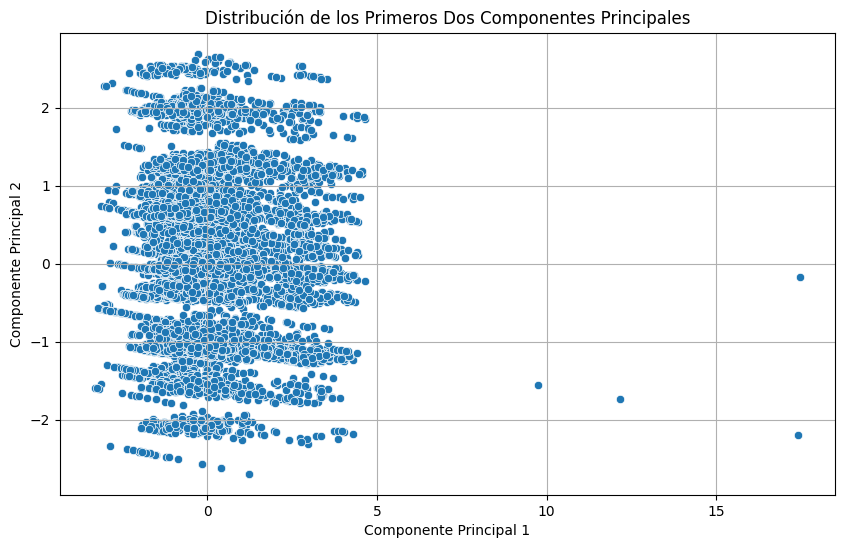

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'])
plt.title('Distribución de los Primeros Dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

**PC1:**

- total_likes_on_outofstation_checkin_received: 0.851432
Esta variable tiene una carga alta y positiva, lo que indica que contribuye significativamente al componente principal 1. Un aumento en el número de "likes" en check-ins de viajes fuera de la estación está asociado con una mayor puntuación en este componente.

- Daily_Avg_mins_spend_on_traveling_page: 0.876547
Similar a la anterior, esta variable también tiene una carga alta y positiva, indicando que pasar más tiempo en la página de viajes diariamente está muy relacionado con valores altos en PC1.

- Yearly_avg_view_on_travel_page: 0.686923
También contribuye positivamente a PC1, aunque en menor medida que las dos anteriores. Esto sugiere que un mayor promedio de visualizaciones en la página de viajes anualmente se asocia con este componente.

- Adult_flag: 0.137561
La carga es baja y positiva, indicando que esta variable tiene una influencia débil en PC1.

- following_company_page: 0.028436
Esta variable tiene la carga más baja en PC1, lo que indica que tiene muy poca influencia en este componente.

- preferred_device: 0.062309
Al igual que las anteriores, esta carga es baja y sugiere que el dispositivo preferido tiene una influencia débil en PC1.

**PC2**:

- preferred_device: 0.720336
Esta variable tiene una carga alta y positiva en PC2, lo que indica que el tipo de dispositivo preferido tiene un papel significativo en este componente.

- following_company_page: 0.600600
También tiene una carga positiva notable, sugiriendo que seguir la página de la empresa está bastante relacionado con PC2.

- Adult_flag: -0.363203
Esta variable tiene una carga negativa, indicando que una mayor proporción de adultos está asociada con puntuaciones más bajas en PC2.

- total_likes_on_outofstation_checkin_received: -0.059149
La carga es muy baja y negativa, lo que sugiere que no tiene una influencia significativa en este componente.

- Daily_Avg_mins_spend_on_traveling_page: -0.048248
Similarmente, esta variable no influye mucho en PC2.

- Yearly_avg_view_on_travel_page: 0.117413
Esta carga es baja y positiva, indicando que la influencia de esta variable en PC2 es débil.

**Conclusiones**

- PC1 parece estar principalmente relacionado con el comportamiento en la página web, especialmente el tiempo diario y las interacciones (likes) en check-ins, lo que sugiere que este componente podría capturar la actividad y el compromiso del usuario con el contenido relacionado con viajes.

- PC2 parece relacionarse más con el tipo de dispositivo utilizado y el seguimiento de la empresa, mientras que el estado de adulto tiene una influencia negativa, lo que podría indicar que los adultos (o aquellos que son adultos en términos de edad) podrían estar utilizando dispositivos diferentes o estar menos comprometidos en ciertas acciones.